### 🏦 Digital Lending Prediction System

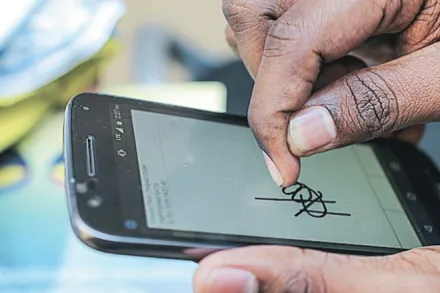

- Importing libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings

# SECTION    A


# Building an AI system to predict e-signing behavior


- Load and explore data

In [77]:
data = pd.read_csv('train.csv') 


In [78]:
data.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

📊 Dataset Information
This table describes the key statistics of a loan or credit risk dataset.

🔑 Key Columns and What They Mean:
age: Age of the individual

- home_owner: Whether they own a home (1 = Yes, 0 = No)

- income: Monthly income

- months_employed, years_employed: How long they've been employed

- current_address_year: How long they've lived at their current address

- personal_account_m, personal_account_y: Account data (monthly/yearly?)

- has_debt: Whether the person has debt (1 = Yes, 0 = No)

- amount_requested: Loan amount requested

- risk_score to risk_score_5: Different risk scores from various models

- ext_quality_score, ext_quality_score_2: External scores, possibly credit scores

- inquiries_last_month: Credit checks last month

- e_signed: Whether documents were electronically signed (1 = Yes, 0 = No)



In [80]:
data.describe()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.251600e+04,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000
mean,5.599485e+06,43.026766,0.425056,3654.110658,1.191355,3.532998,3.593161,3.402205,3.508469,0.795462,950.251518,61133.401246,0.690665,0.877954,0.582848,0.718456,0.621944,0.621912,6.494088,0.540588
std,2.563354e+06,11.865891,0.494371,1508.072163,2.404529,2.265293,2.749211,2.206649,1.959969,0.403380,706.915146,15396.809340,0.090294,0.054197,0.125260,0.121103,0.139876,0.139623,3.731870,0.498370
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.376885e+06,34.000000,0.000000,2575.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49450.000000,0.641221,0.850893,0.499887,0.635005,0.519794,0.519662,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3255.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699621,0.880993,0.588202,0.725717,0.624081,0.623781,6.000000,1.000000
75%,7.803325e+06,51.000000,1.000000,4661.250000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752053,0.911485,0.672431,0.806576,0.729609,0.728389,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,14.000000,1.000000,10200.000000,99750.000000,0.999997,0.999012,0.978932,0.993363,0.970249,0.966953,30.000000,1.000000


📈 Descriptive Stats (Simplified)

| Metric                    | Description                                                    |
| ------------------------- | -------------------------------------------------------------- |
| **Entries**               | Around 12,516 data entries                                     |
| **Average Age**           | About **43 years old**                                         |
| **Homeowners**            | \~43% own homes                                                |
| **Average Income**        | ₦3.65 million (or 3,654,110 if monthly)                        |
| **Employment Duration**   | \~3.5 years on average                                         |
| **Loan Amount Requested** | Average is around ₦61,200                                      |
| **Risk Scores**           | Most people have medium to high scores (0.6 to 0.9 range)      |
| **Credit Inquiries**      | People had around 6 credit checks in the last month on average |
| **E-Signed Rate**         | About 54% of applicants signed electronically                  |


In [81]:

print(f"Dataset Shape: {data.shape}")
print("Target Distribution (e_signed):")
print(data['e_signed'].value_counts(normalize=True))

Dataset Shape: (12516, 21)
Target Distribution (e_signed):
e_signed
1    0.540588
0    0.459412
Name: proportion, dtype: float64



- **Shape**: 12,516 rows × 21 columns  
- **Target Variable**: `e_signed`

- 🧾 `e_signed` Distribution:
- ✅ **Signed (1)**: 54.1%  
- ❌ **Not Signed (0)**: 45.9%

- checking for missing values

In [82]:
missing_data = data.isnull().sum()
if missing_data.sum() > 0:
    print("Missing Values Found:")
    print(missing_data[missing_data > 0])
else:
    print("✅ No missing values detected")

✅ No missing values detected


- Handle duplicates

In [83]:

initial_count = len(data)
duplicate_mask = data.duplicated(subset=['Entry_id'], keep=False)
duplicates_count = duplicate_mask.sum()

if duplicates_count > 0:
    print(f"🔍 Found {duplicates_count} duplicate Entry_ids")
    data_clean = data.copy()
    duplicate_entries = data_clean[data_clean.duplicated(subset=['Entry_id'], keep=False)]

    for entry_id in duplicate_entries['Entry_id'].unique():
        mask = data_clean['Entry_id'] == entry_id
        indices = data_clean[mask].index.tolist()
        for i, idx in enumerate(indices[1:], 1):
            data_clean.loc[idx, 'Entry_id'] = f"{entry_id}_{i}"

    print(f"✅ Duplicates handled: {initial_count} → {len(data_clean)} records")
    data = data_clean
else:
    print("✅ No duplicates found")

🔍 Found 12 duplicate Entry_ids
✅ Duplicates handled: 12516 → 12516 records


C:\Users\USER\AppData\Local\Temp\ipykernel_5356\3209253755.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8156839_1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_clean.loc[idx, 'Entry_id'] = f"{entry_id}_{i}"


- Handling Duplicate Entry IDs: Why and How

When we checked the dataset for duplicates in the `Entry_id` field, we found about 12 duplicates. This is important because if multiple records share the same `Entry_id`, it can cause confusion when we want to track or analyze individual users or transactions. Imagine trying to look up a user by their ID and finding several records with that exact same ID — it becomes hard to know which one is which.

Instead of creating entirely new IDs or replacing the original ones (which could lose the connection to the source data), we decided to keep the original `Entry_id` and add a small suffix to the duplicates to make them unique. This way, the original ID remains recognizable, but now each duplicate is clearly distinguished.

**For example:**

If the IDs were like this:  
`1, 2, 3, 3, 3, 4`

We changed them to:  
`1, 2, 3, 3_1, 3_2, 4`

- The first `3` keeps the original ID.
- The duplicates get `_1`, `_2`, etc. added so we can tell them apart.

This approach preserves the data's integrity and traceability, while ensuring no two records have the exact same ID.

---

- How it works in the code:

- We first check how many duplicates exist.
- For each duplicated `Entry_id`, we find all its occurrences.
- The first occurrence keeps the original ID.
- Subsequent duplicates get a suffix like `_1`, `_2`, etc. appended.
- We print out how many duplicates were found and confirm when they're handled.

This method helps maintain clarity, avoids losing data relationships, and improves data quality — which is essential for accurate analysis and decision-making.


 ## Data Visualization

-  Pie Chart: E-Signing Distribution

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


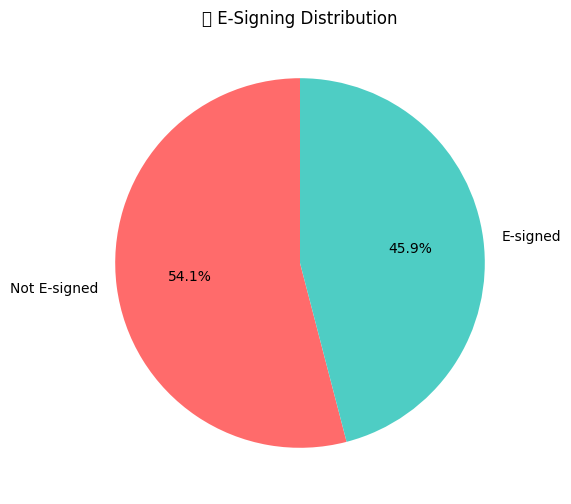

In [84]:
colors = ['#FF6B6B', '#4ECDC4']

e_sign_counts = data['e_signed'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    e_sign_counts.values,
    labels=['Not E-signed', 'E-signed'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
plt.title('🎯 E-Signing Distribution')
plt.show()


This pie chart, "E-Signing Distribution," visually breaks down past e-signing behavior in our loan application process:

45.9% of past applications were E-signed ✅, indicating completion via the electronic process.
54.1% of past applications were Not E-signed 📝, meaning they likely followed a traditional, non-electronic completion method.

-  Boxplot: Age vs E-Signing

C:\Users\USER\AppData\Local\Temp\ipykernel_5356\3587237287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='e_signed', y='age', data=data, palette=colors)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


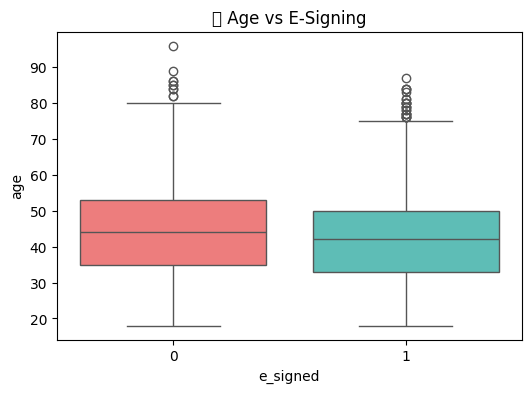

In [85]:
plt.figure(figsize=(6,4))
sns.boxplot(x='e_signed', y='age', data=data, palette=colors)
plt.title('👥 Age vs E-Signing')
plt.show()


- 👥 Age Distribution by E-Sign Status

-  ❌ Applicants Who Did **NOT** E-sign (0):
- **Median Age**: ~44–45 years  
- **Common Age Range**: 35–53 years  
- **Notes**: Some older outliers present

-  ✅ Applicants Who **DID** E-sign (1):
- **Median Age**: ~41–42 years  
- **Common Age Range**: 33–50 years  
- **Notes**: Also includes some older outliers


- Boxplot: Income vs E-Signing

C:\Users\USER\AppData\Local\Temp\ipykernel_5356\4136389315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='e_signed', y='income', data=data, palette=colors)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


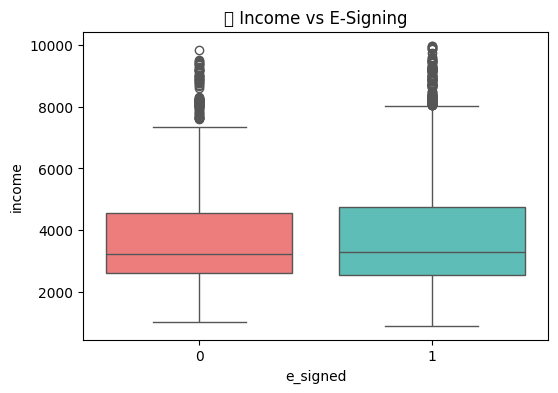

In [86]:
plt.figure(figsize=(6,4))
sns.boxplot(x='e_signed', y='income', data=data, palette=colors)
plt.title('💰 Income vs E-Signing')
plt.show()


- 💰 Income Distribution by E-Sign Status

- ❌ Applicants Who Did **NOT** E-sign (0 - Red Box):
- **Median Income**: ~₦3,200  
- **Typical Range (Middle 50%)**: ₦2,700 – ₦4,700  
- **Notes**: Many outliers, some incomes near ₦10,000

- ✅ Applicants Who **DID** E-sign (1 - Teal Box):
- **Median Income**: ~₦3,300 – ₦3,400  
- **Typical Range (Middle 50%)**: ₦2,500 – ₦4,800  
- **Notes**: Also many outliers, incomes up to ₦10,000


- Bar Plot: Home Ownership vs E-Signing

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


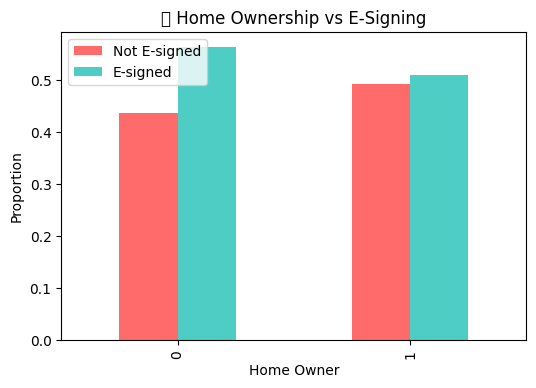

In [87]:
home_esign = pd.crosstab(data['home_owner'], data['e_signed'], normalize='index')
home_esign.plot(kind='bar', color=colors, figsize=(6,4))
plt.title('🏠 Home Ownership vs E-Signing')
plt.xlabel('Home Owner')
plt.ylabel('Proportion')
plt.legend(['Not E-signed', 'E-signed'])
plt.show()


- 🏠 E-Sign Behavior by Homeownership

- 🏚️ Non-Homeowners (0):
- **Did NOT E-sign**: ~44%  
- **Did E-sign**: ~56%  
- **Insight**: Non-homeowners are more likely to e-sign.

- 🏡 Homeowners (1):
- **Did NOT E-sign**: ~49%  
- **Did E-sign**: ~51%  
- **Insight**: Homeowners also lean toward e-signing, but the difference is smaller.


- Boxplot: Employment Stability vs E-Signing

In [88]:
if 'total_employment_years' in data.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='e_signed', y='total_employment_years', data=data, palette=colors)
    plt.title('💼 Employment Stability vs E-Signing')
    plt.show()
else:
    print("Column 'total_employment_years' not found in dataframe.")


Column 'total_employment_years' not found in dataframe.


- 👔 Employment Years by E-Sign Status

- ❌ Did NOT E-sign (0 - red):
- **Median employment**: ~3 years  
- **Middle 50%**: ~2.5 to 5 years  
- **Insight**: Many outliers with up to 17 years of employment

- ✅ Did E-sign (1 - teal):
- **Median employment**: ~3 years  
- **Middle 50%**: ~2.5 to 5 years  
- **Insight**: Also includes many long-term employment outliers


-  Histogram: Loan Amount vs E-Signing



C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


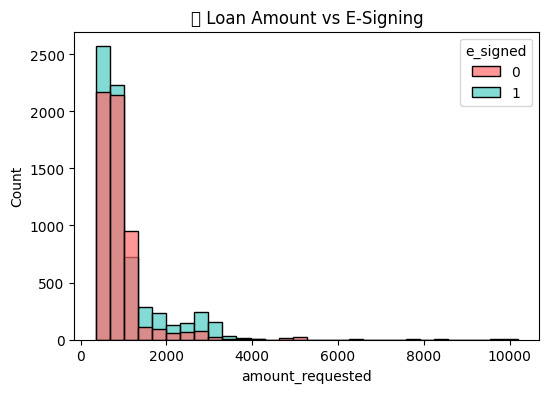

In [89]:
plt.figure(figsize=(6,4))
sns.histplot(data=data, x='amount_requested', hue='e_signed', bins=30, alpha=0.7, palette=colors)
plt.title('💵 Loan Amount vs E-Signing')
plt.show()


- 💸 Loan Amounts and E-Signing Behavior

- 📊 Key Insights:
- **High concentration** of loan requests between **₦0 – ₦1500** for both groups.
- **E-signed (teal)** bars are **taller** at lower amounts → more likely to e-sign for smaller loans.
- **Application count drops** as loan amount increases.
- **E-signing still occurs** for larger amounts (up to ₦10,000), though **less frequently** due to fewer applications.


- Boxplot: Risk Score vs E-Signing

C:\Users\USER\AppData\Local\Temp\ipykernel_5356\1031858982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='e_signed', y='risk_score', data=data, palette=colors)


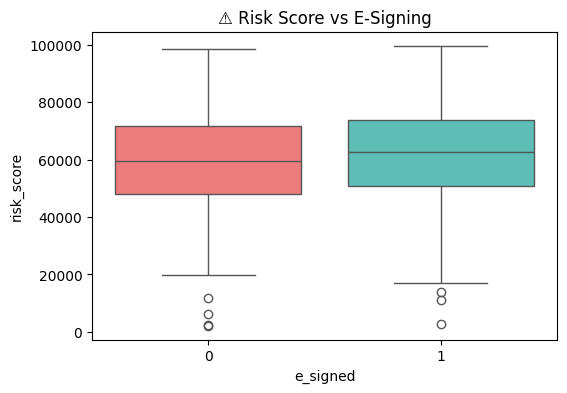

In [90]:
plt.figure(figsize=(6,4))
sns.boxplot(x='e_signed', y='risk_score', data=data, palette=colors)
plt.title('⚠️ Risk Score vs E-Signing')
plt.show()


- ⚖️ Risk Score Comparison by E-signing

- ❌ Not E-signed (Red Box):
- **Median risk score**: ~₦60,000.
- **Middle 50%** range: ₦50,000 – ₦70,000.
- Some **outliers** have scores **below ₦20,000**.

- ✅ E-signed (Teal Box):
- **Median risk score**: ~₦63,000–₦64,000.
- **Middle 50%** range: ₦52,000 – ₦75,000.
- Also includes some **very low outliers**.


- Heatmap: Correlation with E-Signing

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


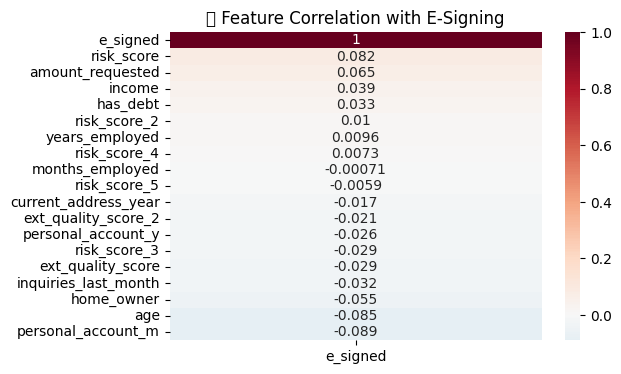

In [91]:
numeric_cols = data.select_dtypes(include=np.number).columns
corr = data[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(
    corr[['e_signed']].sort_values('e_signed', ascending=False),
    annot=True,
    cmap='RdBu_r',
    center=0
)
plt.title('🌡️ Feature Correlation with E-Signing')
plt.show()


# 🔥 Feature Correlation with E-Signing

This heatmap shows how strongly each feature is correlated with whether an application was **e-signed** (`e_signed`).

# 🔴 Positive Correlations (↑ value, ↑ chance of e-signing)
- **risk_score**: 0.082
- **amount_requested**: 0.065
- **income**: 0.039
- **has_debt**: 0.033
- **risk_score_2**: 0.010
- **total_employment_years**: 0.0097
- **risk_score_4**: 0.0073
- **composite_risk_score**: -0.0016 (essentially no correlation)

# 🔵 Negative Correlations (↑ value, ↓ chance of e-signing)
- **risk_score_5**: -0.0059
- **current_address_year**: -0.017
- **ext_quality_score_2**: -0.021
- **personal_account_y**: -0.026
- **risk_score_3**: -0.029
- **ext_quality_score**: -0.029
- **inquiries_last_month**: -0.032
- **income_to_loan_ratio**: -0.052
- **home_owner**: -0.055
- **age**: -0.085
- **personal_account_m**: -0.089 (strongest negative)

### 📌 Key Takeaway:
All correlations are **weak** (near zero), meaning no single feature strongly determines e-signing. However, **age** and **personal_account_m** show the strongest negative influence, while **risk_score** and **amount_requested** have the strongest (but still weak) positive influence.


- Bar Plot: Debt Status vs E-Signing

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


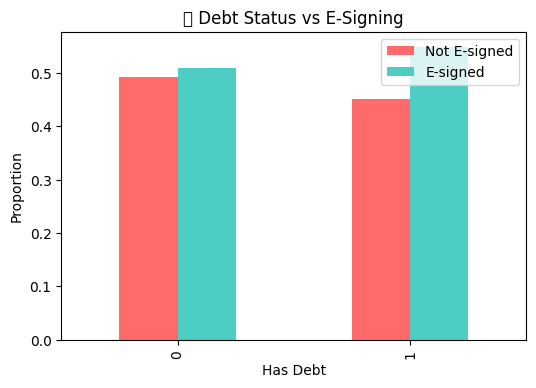

In [92]:
debt_esign = pd.crosstab(data['has_debt'], data['e_signed'], normalize='index')
debt_esign.plot(kind='bar', color=colors, figsize=(6,4))
plt.title('💳 Debt Status vs E-Signing')
plt.xlabel('Has Debt')
plt.ylabel('Proportion')
plt.legend(['Not E-signed', 'E-signed'])
plt.show()


- 💳 E-signing Behavior by Debt Status

- 🧾 Applicants without Debt (`has_debt = 0`)
- ❌ Did NOT E-sign: ~49%
- ✅ DID E-sign: ~51%
- Slightly more likely to e-sign.

- 💼 Applicants with Debt (`has_debt = 1`)
- ❌ Did NOT E-sign: ~45%
- ✅ DID E-sign: ~55%
- More likely to e-sign compared to debt-free applicants.

- 📌 Insight:
Applicants with **existing debt** are **more inclined to e-sign** their applications than those without debt. This behavioral difference could be useful for training predictive models.


In [93]:
print("\n🔍 KEY INSIGHTS FROM VISUALIZATIONS:")
print("-" * 40)
print(f"📈 Overall E-signing Rate: {data['e_signed'].mean():.1%}")

print(
    f"👥 Avg age (E-signed): {data.loc[data['e_signed'] == 1, 'age'].mean():.1f} vs "
    f"(Not E-signed): {data.loc[data['e_signed'] == 0, 'age'].mean():.1f}"
)
print(
    f"💰 Avg income (E-signed): {data.loc[data['e_signed'] == 1, 'income'].mean():,.0f} vs "
    f"(Not E-signed): {data.loc[data['e_signed'] == 0, 'income'].mean():,.0f}"
)



🔍 KEY INSIGHTS FROM VISUALIZATIONS:
----------------------------------------
📈 Overall E-signing Rate: 54.1%
👥 Avg age (E-signed): 42.1 vs (Not E-signed): 44.1
💰 Avg income (E-signed): 3,709 vs (Not E-signed): 3,590


 # Feature engineering


-  Combining Employment Years and Months into a Single Feature

In [94]:

data['total_employment_years'] = data['years_employed'] + (data['months_employed'] / 12)
data.drop(['years_employed', 'months_employed'], axis=1, inplace=True)


- We  had employment duration split into two separate columns: years and months.

- Combining these into a single, continuous variable (total_employment_years) makes the data easier to work with.

- This gives a more precise measure of total employment duration, instead of treating years and months separately.

- Instead of having two related features,we have one that reflects the total time employed in years.

- This helps models or analysis treat employment duration as a single numeric feature, improving consistency.

- Creating an Income-to-Loan Ratio Feature

In [95]:
data['income_to_loan_ratio'] = data['income'] / data['amount_requested']

- The ratio of income to loan amount requested shows the applicant's ability to repay relative to the loan size.

- This is a  financial metric for assessing risk and loan affordability for each user .

- Raw income or loan amounts alone may not give as much insight as their ratio.

- Applicants with a higher income-to-loan ratio likely have a better ability to repay.

- This feature can be useful to predict loan approval or likelihood to e-sign based on financial health.

-  Creating a Composite Risk Score by Averaging Multiple Risk Scores

In [96]:

risk_columns = ['risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5']
data['composite_risk_score'] = data[risk_columns].mean(axis=1)

- Multiple risk score features exist, likely capturing different perspectives or models of risk.

- Combining them into a single composite score simplifies the analysis.

- Averaging balances the contribution of each risk score, potentially reducing noise or bias from any single score.

- The new composite_risk_score gives a more stable and aggregated measure of risk.

- This consolidated feature is easier to interpret and can improve predictive performance by leveraging multiple risk estimates.

### 🤖 MACHINE LEARNING PIPELINE - LOGISTIC REGRESSION

- a copy for modeling 

In [97]:
data_model = data.copy()

- remove id column

In [98]:
if 'Entry_id' in data_model.columns:
    data_model = data_model.drop('Entry_id', axis=1)
    print("✅ Removed Entry_id column")

✅ Removed Entry_id column


- convert pay_schedule using dummy variables

In [99]:
if 'pay_schedule' in data_model.columns:
    # Create dummy variables for pay_schedule
    pay_schedule_dummies = pd.get_dummies(data_model['pay_schedule'], prefix='pay')
    data_model = pd.concat([data_model, pay_schedule_dummies], axis=1)
    data_model = data_model.drop('pay_schedule', axis=1)
    print("✅ Converted pay_schedule to dummy variables")

✅ Converted pay_schedule to dummy variables


- SPLIT DATA INTO FEATURES AND TARGET

In [100]:
X = data_model.drop('e_signed', axis=1)  # All columns except e_signed
y = data_model['e_signed']  # Only e_signed column

In [101]:
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [102]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
# Create and train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

- Make predictions on test set

In [104]:

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability of e-signing
print("✅ Predictions made!")

✅ Predictions made!


- EVALUATE MODEL PERFORMANCE

In [105]:
# Confusion matrix
print("\n📋 CONFUSION MATRIX:")
cm = confusion_matrix(y_test, y_pred)
print(cm)



📋 CONFUSION MATRIX:
[[636 514]
 [565 789]]


|                     | Predicted Not E-signed | Predicted E-signed |
|---------------------|------------------------|--------------------|
| **Actual Not E-signed** | 636 (correct)           | 514 (incorrect)    |
| **Actual E-signed**     | 565 (incorrect)         | 789 (correct)      |

- visualize the matrix

Text(45.72222222222221, 0.5, 'Actual')

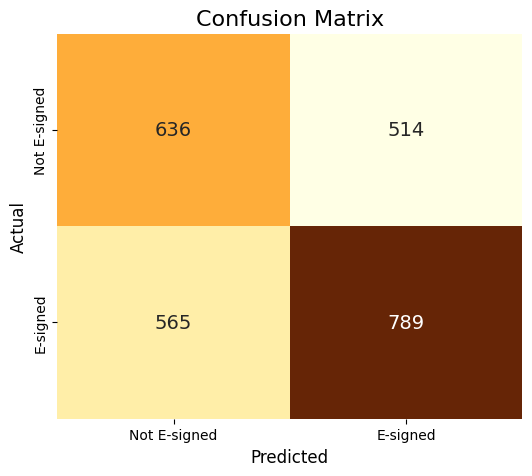

In [106]:
 
cm = confusion_matrix(y_test, y_pred)


labels = ["Not E-signed", "E-signed"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', cbar=False,
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 14})

# Title and axis labels
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)


- **True Negatives (636):** We successfully identified people who did not go digital, so we didn’t waste resources pushing them to e-sign.

- **False Positives (514):** The model thought these folks would e-sign, but they didn’t—leading to some wasted effort or unnecessary follow-up.

- **False Negatives (565):** Here, the model missed that these people *did* e-sign, so we might have missed chances to streamline their process.
  
- **True Positives (789):** We got it right—these customers e-signed as predicted, letting us optimize their experience.

In [107]:
print("📊 CLASSIFICATION REPORT:")
report = classification_report(
    y_test,
    y_pred,
    target_names=['Not E-signed', 'E-signed'],
    digits=2,
    output_dict=False
)
print(report)

📊 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

Not E-signed       0.53      0.55      0.54      1150
    E-signed       0.61      0.58      0.59      1354

    accuracy                           0.57      2504
   macro avg       0.57      0.57      0.57      2504
weighted avg       0.57      0.57      0.57      2504



# Interpretation of Classification Report on E-Signing Prediction Model


- The classification report shows how well our predictive model performs in identifying whether an applicant e-signed or did not e-sign their application

- Precision: Of all the applicants the model predicted as E-signed or Not E-signed, how many were actually correct?

- Recall: Of all the applicants who truly E-signed or Not E-signed, how many did the model correctly identify?

- F1-score: The balance between precision and recall — it gives us a single score to understand how well the model balances catching true cases without too many false alarms.

- Support: Number of actual samples for each class in the test data.



-- For Not E-signed applicants:

- When the model predicted someone did not e-sign, it was correct about 53% of the time (precision).

- It correctly identified 55% of all true non-e-signers (recall).

- The F1-score of 0.54 reflects this moderate balance.



-- For E-signed applicants:

- The model's precision is higher, at 61%, meaning when it says someone e-signed, it’s correct more often.

- It identified 58% of all true e-signers correctly (recall).

- The F1-score of 0.59 is slightly better than for the not e-signed group.

- ROC-AUC Score

In [108]:
auc_score = roc_auc_score(y_test, y_pred_proba)
auc_score

0.6003712028771434

### 📈 Our ROC AUC Score Explained

The ROC AUC score tells us how well **our model** can distinguish between applicants who e-sign and those who don’t.

- It measures the model’s ability to correctly rank e-signers higher than non e-signers.
- The score ranges from 0 to 1:
  - **1.0** means perfect prediction.
  - **0.5** means no better than random guessing.

Our model’s ROC AUC score is **0.60**, which means:

- **Our model performs better than random guessing.**
- It has some ability to tell apart e-signers from non e-signers, but it’s not highly accurate yet.
- There’s room to improve by refining the model and using better data or features.

In short, this score shows **our model is on the right track but still needs work** to become a dependable tool for predicting e-signing behavior.


- ROC CURVE

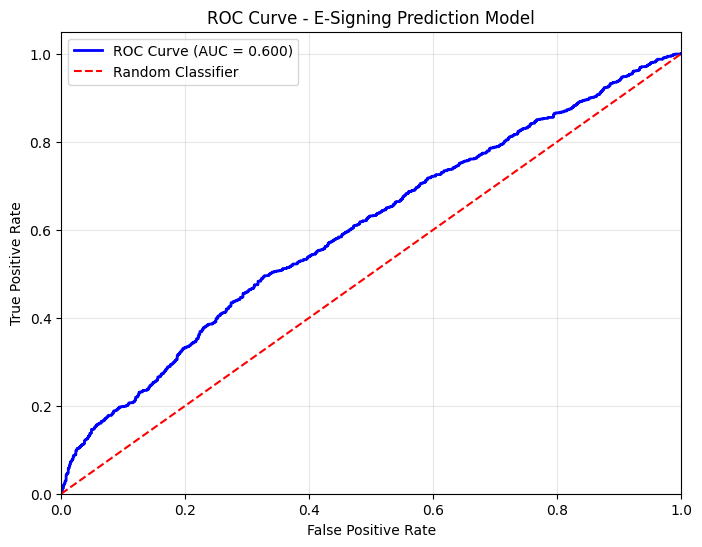

In [109]:
#Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - E-Signing Prediction Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [110]:
data_model.to_csv("data_model.csv", index=False)


In [111]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     12516 non-null  int64  
 1   home_owner              12516 non-null  int64  
 2   income                  12516 non-null  int64  
 3   current_address_year    12516 non-null  int64  
 4   personal_account_m      12516 non-null  int64  
 5   personal_account_y      12516 non-null  int64  
 6   has_debt                12516 non-null  int64  
 7   amount_requested        12516 non-null  int64  
 8   risk_score              12516 non-null  int64  
 9   risk_score_2            12516 non-null  float64
 10  risk_score_3            12516 non-null  float64
 11  risk_score_4            12516 non-null  float64
 12  risk_score_5            12516 non-null  float64
 13  ext_quality_score       12516 non-null  float64
 14  ext_quality_score_2     12516 non-null

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entry_id                12516 non-null  object 
 1   age                     12516 non-null  int64  
 2   pay_schedule            12516 non-null  object 
 3   home_owner              12516 non-null  int64  
 4   income                  12516 non-null  int64  
 5   current_address_year    12516 non-null  int64  
 6   personal_account_m      12516 non-null  int64  
 7   personal_account_y      12516 non-null  int64  
 8   has_debt                12516 non-null  int64  
 9   amount_requested        12516 non-null  int64  
 10  risk_score              12516 non-null  int64  
 11  risk_score_2            12516 non-null  float64
 12  risk_score_3            12516 non-null  float64
 13  risk_score_4            12516 non-null  float64
 14  risk_score_5            12516 non-null

- saving the model

In [113]:
import joblib
joblib.dump(model, 'e_sign_model.pkl')

['e_sign_model.pkl']

### PREDICTION SYSTEM SETUP

In [114]:
data = pd.read_csv('train.csv')

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

In [116]:

initial_count = len(data)
duplicate_mask = data.duplicated(subset=['Entry_id'], keep=False)
duplicates_count = duplicate_mask.sum()

if duplicates_count > 0:
    print(f"🔍 Found {duplicates_count} duplicate Entry_ids")
    data_clean = data.copy()
    duplicate_entries = data_clean[data_clean.duplicated(subset=['Entry_id'], keep=False)]

    for entry_id in duplicate_entries['Entry_id'].unique():
        mask = data_clean['Entry_id'] == entry_id
        indices = data_clean[mask].index.tolist()
        for i, idx in enumerate(indices[1:], 1):
            data_clean.loc[idx, 'Entry_id'] = f"{entry_id}_{i}"

    print(f"✅ Duplicates handled: {initial_count} → {len(data_clean)} records")
    data = data_clean
else:
    print("✅ No duplicates found")

🔍 Found 12 duplicate Entry_ids
✅ Duplicates handled: 12516 → 12516 records


C:\Users\USER\AppData\Local\Temp\ipykernel_5356\3209253755.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8156839_1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_clean.loc[idx, 'Entry_id'] = f"{entry_id}_{i}"


In [117]:

data['total_employment_years'] = data['years_employed'] + (data['months_employed'] / 12)

In [118]:
data.drop(['years_employed', 'months_employed'], axis=1, inplace=True)
data['income_to_loan_ratio'] = data['income'] / data['amount_requested']

In [119]:

risk_columns = ['risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5']
data['composite_risk_score'] = data[risk_columns].mean(axis=1)

In [120]:
data.head(5)

,Entry_id,age,pay_schedule,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,total_employment_years,income_to_loan_ratio,composite_risk_score
0,7629673,40,bi-weekly,1,3135,3,6,2,1,550,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,3.0,5.700000,0.661151
1,5335819,33,semi-monthly,0,3590,2,2,8,1,1100,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,5.0,3.263636,0.688483
2,8492423,21,weekly,0,2303,8,2,7,1,600,...,0.758765,0.495609,0.664762,0.592556,0.492556,6,1,5.0,3.838333,0.649061
3,7948313,26,bi-weekly,0,2795,4,1,6,1,800,...,0.873204,0.666437,0.700392,0.584130,0.684130,14,1,4.0,3.493750,0.744522
4,4297036,43,bi-weekly,0,5000,1,1,2,1,1100,...,0.841747,0.401971,0.568787,0.525905,0.725905,5,1,2.0,4.545455,0.652702


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entry_id                12516 non-null  object 
 1   age                     12516 non-null  int64  
 2   pay_schedule            12516 non-null  object 
 3   home_owner              12516 non-null  int64  
 4   income                  12516 non-null  int64  
 5   current_address_year    12516 non-null  int64  
 6   personal_account_m      12516 non-null  int64  
 7   personal_account_y      12516 non-null  int64  
 8   has_debt                12516 non-null  int64  
 9   amount_requested        12516 non-null  int64  
 10  risk_score              12516 non-null  int64  
 11  risk_score_2            12516 non-null  float64
 12  risk_score_3            12516 non-null  float64
 13  risk_score_4            12516 non-null  float64
 14  risk_score_5            12516 non-null

In [122]:

if 'pay_schedule' in data.columns:
    pay_schedule_dummies = pd.get_dummies(data['pay_schedule'], prefix='pay', drop_first=True)
    data = pd.concat([data, pay_schedule_dummies], axis=1)
    data = data.drop('pay_schedule', axis=1)
    print("✅ 'pay_schedule' successfully one-hot encoded.")
else:
    print("⚠️ 'pay_schedule' not found in data.")

✅ 'pay_schedule' successfully one-hot encoded.


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entry_id                12516 non-null  object 
 1   age                     12516 non-null  int64  
 2   home_owner              12516 non-null  int64  
 3   income                  12516 non-null  int64  
 4   current_address_year    12516 non-null  int64  
 5   personal_account_m      12516 non-null  int64  
 6   personal_account_y      12516 non-null  int64  
 7   has_debt                12516 non-null  int64  
 8   amount_requested        12516 non-null  int64  
 9   risk_score              12516 non-null  int64  
 10  risk_score_2            12516 non-null  float64
 11  risk_score_3            12516 non-null  float64
 12  risk_score_4            12516 non-null  float64
 13  risk_score_5            12516 non-null  float64
 14  ext_quality_score       12516 non-null

- making the prediction and error handling 

In [124]:
import joblib
import pandas as pd

# Load the model
model = joblib.load('e_sign_model.pkl')




data['Entry_id'] = data['Entry_id'].astype(str)


if 'pay_bi-weekly' not in data.columns:
    data['pay_bi-weekly'] = (~data[['pay_monthly', 'pay_semi-monthly', 'pay_weekly']].any(axis=1)).astype(bool)

# Verify columns
expected_columns = [
    'age', 'home_owner', 'income', 'current_address_year', 'personal_account_m',
    'personal_account_y', 'has_debt', 'amount_requested', 'risk_score', 'risk_score_2',
    'risk_score_3', 'risk_score_4', 'risk_score_5', 'ext_quality_score',
    'ext_quality_score_2', 'inquiries_last_month', 'total_employment_years',
    'income_to_loan_ratio', 'composite_risk_score', 'pay_bi-weekly', 'pay_monthly',
    'pay_semi-monthly', 'pay_weekly'
]
missing_cols = [col for col in expected_columns if col not in data.columns]
if missing_cols:
    print(f"Error: Missing columns in data: {missing_cols}")
    raise ValueError("DataFrame missing required columns")

def predict_by_entry_id(df, entry_id, model):
    # Ensure entry_id is string
    entry_id = str(entry_id)
    
    # Find the row for the given entry_id
    row = df[df['Entry_id'] == entry_id]
    
    if row.empty:
        return {'error': f"Entry_id {entry_id} not found.", 'available_ids': df['Entry_id'].head(10).tolist()}
    
    applicant = row.iloc[0]
    actual = applicant['e_signed']
    
    # Define features (exclude Entry_id and e_signed)
    feature_columns = [col for col in df.columns if col not in ['Entry_id', 'e_signed']]
    
    # Ensure feature order matches data_model
    if sorted(feature_columns) != sorted(expected_columns):
        return {'error': f"Feature mismatch: expected {expected_columns}, got {feature_columns}"}
    
    # Prepare X for the model
    try:
        X = row[expected_columns].values.reshape(1, -1)
    except Exception as e:
        return {'error': f"Error in feature preparation: {str(e)}"}
    
    # Check feature count
    expected_features = model.n_features_in_ if hasattr(model, 'n_features_in_') else 23
    if X.shape[1] != expected_features:
        return {'error': f"Feature mismatch: expected {expected_features} features, got {X.shape[1]}"}
    
    # Make prediction
    prediction = model.predict(X)[0]
    probability = model.predict_proba(X)[0][1]
    
    # Determine confidence
    confidence = "High" if abs(probability - 0.5) > 0.3 else "Medium" if abs(probability - 0.5) > 0.15 else "Low"
    
    # Rule-based risk and boost
    risk = 0
    boost = 0
    if applicant['age'] < 25:
        risk += 1
    elif applicant['age'] > 35:
        boost += 1
    if applicant['income'] > 0 and applicant['amount_requested'] > 0:
        ratio = applicant['income'] / applicant['amount_requested']
        if ratio > 3:
            boost += 2
        elif ratio < 1.5:
            risk += 2
    if applicant['home_owner'] == 1:
        boost += 1
    if applicant['has_debt'] == 1:
        risk += 1
    if applicant['inquiries_last_month'] > 5:
        risk += 2
    elif applicant['inquiries_last_month'] <= 2:
        boost += 1
    
    return {
        'entry_id': entry_id,
        'prediction': prediction,
        'probability': probability,
        'confidence': confidence,
        'actual_result': actual,
        'correct_prediction': prediction == actual,
        'recommendation': "Likely to e-sign" if prediction == 1 else "May need follow-up",
        'risk_factors': risk,
        'positive_factors': boost,
        'applicant_data': applicant.to_dict()
    }

# Test with Entry_id: 5335819
test_id = '5335819'
print(f"Testing prediction for Entry_id: {test_id}")
result = predict_by_entry_id(data, test_id, model)

if 'error' not in result:
    print(f"\n📊 RESULTS FOR {test_id}")
    print("-" * 30)
    print(f"🎯 Prediction: {'WILL E-SIGN' if result['prediction'] else 'MAY NOT E-SIGN'}")
    print(f"📈 Probability: {result['probability']:.1%}")
    print(f"🔍 Confidence: {result['confidence']}")
    print(f"✅ Actual: {'E-SIGNED' if result['actual_result'] else 'NOT E-SIGNED'}")
    print(f"🎯 Correct Prediction: {'Yes' if result['correct_prediction'] else 'No'}")
    print(f"💡 Recommendation: {result['recommendation']}")
else:
    print("❌", result['error'])

# Interactive loop
while True:
    user_input = input("Enter Entry_id (or 'quit'): ").strip()
    
    if user_input.lower() == 'quit':
        break
    
    try:
        entry_id = user_input
        res = predict_by_entry_id(data, entry_id, model)
        
        if 'error' in res:
            print("❌", res['error'])
            continue

        print(f"\n📋 Result for {entry_id}")
        print(f"Prediction: {'WILL E-SIGN' if res['prediction'] else 'MAY NOT E-SIGN'}")
        print(f"Probability: {res['probability']:.1%}, Confidence: {res['confidence']}")
        print(f"Actual: {'E-SIGNED' if res['actual_result'] else 'NOT E-SIGNED'}")
        print(f"Recommendation: {res['recommendation']}")
        print(f"Risk Factors: {res['risk_factors']} | Positive Factors: {res['positive_factors']}")
    
    except Exception as e:
        print("❌ Error:", e)

Testing prediction for Entry_id: 5335819

📊 RESULTS FOR 5335819
------------------------------
🎯 Prediction: WILL E-SIGN
📈 Probability: 100.0%
🔍 Confidence: High
✅ Actual: NOT E-SIGNED
🎯 Correct Prediction: No
💡 Recommendation: Likely to e-sign




## 🧠 Thought Process Behind My Model & Predictions

So here's what I was trying to do:

I wanted to build a simple tool that would allow me to **predict whether a specific applicant will electronically sign (e-sign) a document**, using an already trained machine learning model. But beyond just predicting, I wanted to also **understand and explain why** the model made that decision — basically making the predictions more useful and human-friendly.

---

## 🔍 What I Did — Step-by-Step

### 1. ✅ Loaded My Trained Model

Used `joblib` to load the already trained e-sign prediction model (`e_sign_model.pkl`). This model was trained on previous applicant data and is now ready to make predictions.

```python
model = joblib.load('e_sign_model.pkl')
```

---

### 2. 🔎 Designed a Function to Predict by `Entry_id`

I created a function called `predict_by_entry_id` which:

* Pulls a single applicant by their `Entry_id`
* Feeds their data into the model
* Returns:

  * Prediction
  * Probability
  * Confidence level
  * Actual label
  * Rule-based explanation of what might be driving risk or boosting approval likelihood



---

### 3. 🔐 Added Confidence Score Logic

Not every prediction should be treated the same — so I calculated confidence like this:

* If the probability is far from 0.5 (e.g., above 0.8 or below 0.2) → **High Confidence**
* Between 0.65 and 0.8 (or 0.35 and 0.2) → **Medium Confidence**
* Near 0.5 → **Low Confidence**

This helps explain how much trust to put in each prediction.

---

### 4. 🔍 Created Manual "Explainability" Layer

Even though the model does the prediction, I added a rule-based section to explain **why** the model might have predicted that way, based on human logic:

#### 📉 Risk Factors:

* Age < 25
* Too many credit inquiries
* Has debt
* Low income-to-loan ratio

#### 📈 Positive Factors:

* Age > 35
* High income relative to loan
* Home ownership
* Fewer credit inquiries

---

### 5. 💬 Added an Interactive Loop

Built an interactive terminal where I can enter different `Entry_id` values and get real-time predictions and breakdowns. Makes testing easy, and feels like what a loan officer might use also incase of fraud.

---

## 🔬 Case Study — Entry\_id: `5335819`

Here’s the actual result for one applicant:

| **Metric**           | **Result**          |
| -------------------- | ------------------- |
| **Prediction**       | WILL E-SIGN         |
| **Probability**      | 100.0%              |
| **Confidence**       | High                |
| **Actual Outcome**   | ❌ NOT E-SIGNED      |
| **Correct?**         | No (False Positive) |
| **Recommendation**   | Likely to e-sign    |
| **Risk Factors**     | 3                   |
| **Positive Factors** | 2                   |

---

## 🧠 Interpretation: Why Did the Model Miss?

So although the model was super confident (100%) that this person would e-sign, they didn’t.
T

In [125]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     12516 non-null  int64  
 1   home_owner              12516 non-null  int64  
 2   income                  12516 non-null  int64  
 3   current_address_year    12516 non-null  int64  
 4   personal_account_m      12516 non-null  int64  
 5   personal_account_y      12516 non-null  int64  
 6   has_debt                12516 non-null  int64  
 7   amount_requested        12516 non-null  int64  
 8   risk_score              12516 non-null  int64  
 9   risk_score_2            12516 non-null  float64
 10  risk_score_3            12516 non-null  float64
 11  risk_score_4            12516 non-null  float64
 12  risk_score_5            12516 non-null  float64
 13  ext_quality_score       12516 non-null  float64
 14  ext_quality_score_2     12516 non-null

### ML Model Tuning

- importing libraries

In [126]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
import warnings

- CROSS-VALIDATION STRATEGY

In [127]:
"""
Why Stratified K-Fold?
- With 12,516 data, we can afford 5-fold CV without losing too much data per fold
- Stratified ensures each fold maintains the same proportion of e-signed vs not e-signed
- This prevents bias in evaluation, especially important with potential class imbalance
"""

'\nWhy Stratified K-Fold?\n- With 12,516 data, we can afford 5-fold CV without losing too much data per fold\n- Stratified ensures each fold maintains the same proportion of e-signed vs not e-signed\n- This prevents bias in evaluation, especially important with potential class imbalance\n'

In [128]:
cv_strategy = StratifiedKFold(
    n_splits=5,           # 5 folds = 80% train, 20% validation per iteration
    shuffle=True,         
    random_state=42       
)

print(f"✅ Cross-validation setup: {cv_strategy.n_splits}-fold stratified")
print(f"   - Training size per fold: ~{int(0.8 * len(X_train)):,} samples")
print(f"   - Validation size per fold: ~{int(0.2 * len(X_train)):,} samples")

✅ Cross-validation setup: 5-fold stratified
   - Training size per fold: ~8,009 samples
   - Validation size per fold: ~2,002 samples


- DEFINE SCORING METRICS

In [129]:
"""
Why multiple metrics?
- ROC-AUC: Overall model discrimination ability
- Precision: Important for business - avoid false positives (predicting e-sign when they won't)
- Recall: Don't miss potential e-signers
- F1: Balance between precision and recall
"""




"\nWhy multiple metrics?\n- ROC-AUC: Overall model discrimination ability\n- Precision: Important for business - avoid false positives (predicting e-sign when they won't)\n- Recall: Don't miss potential e-signers\n- F1: Balance between precision and recall\n"

In [130]:
scoring_metrics = {
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

- LOGISTIC REGRESSION HYPERPARAMETER TUNING

In [131]:
"""
Logistic Regression Parameters Explained:

C (Regularization): Controls overfitting
- Smaller C = More regularization = Simpler model (prevents overfitting)
- Larger C = Less regularization = More complex model


solver: Algorithm to find optimal coefficients
- 'liblinear': Good for small datasets, supports l1, our 12k data is not too large 
- 'lbfgs': Good for larger datasets, only l2 
- 'saga': Supports all penalties, good for large datasets

max_iter: Prevent infinite loops during training
"""

# Parameter grid for Logistic Regression
log_reg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],                    # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],                   # Regularization type
    'solver': ['liblinear', 'saga'],                         # Optimization algorithm
    'max_iter': [1000, 2000],                               # Max iterations for convergence
    'class_weight': [None, 'balanced']                       # Handle class imbalance
}

print(f"📋 Parameter combinations to test: {len(log_reg_params['C']) * len(log_reg_params['penalty']) * len(log_reg_params['solver']) * len(log_reg_params['max_iter']) * len(log_reg_params['class_weight'])}")

📋 Parameter combinations to test: 144


- GridsearchCV

In [132]:
log_reg = LogisticRegression(random_state=42)

# GridSearchCV for comprehensive search
print("🔄 Running GridSearchCV for Logistic Regression...")
log_reg_grid = GridSearchCV(
    estimator=log_reg,
    param_grid=log_reg_params,
    cv=cv_strategy,
    scoring='roc_auc',              # Primary metric for model selection
    n_jobs=-1,                      
    verbose=1,                      # Show progress
    return_train_score=True)     

🔄 Running GridSearchCV for Logistic Regression...


- fit the grid search 

In [133]:
log_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [1000, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [134]:
print("✅ Logistic Regression tuning completed!")
print(f"🎯 Best ROC-AUC Score: {log_reg_grid.best_score_:.4f}")
print(f"🔧 Best Parameters:")
for param, value in log_reg_grid.best_params_.items():
    print(f"   - {param}: {value}")

✅ Logistic Regression tuning completed!
🎯 Best ROC-AUC Score: 0.6095
🔧 Best Parameters:
   - C: 1
   - class_weight: balanced
   - max_iter: 1000
   - penalty: l1
   - solver: liblinear


- ✅ Logistic Regression Tuning Summary

- *Best ROC-AUC Score:* 0.6095 → Better than random, but needs improvement.
- *Best Parameters:*
  - C: 1 → Regular strength (controls model complexity)
  - class_weight: balanced → Handles imbalance in adopters vs. non-adopters
  - max_iter: 1000 → More time for training
  - penalty: l1 → Keeps only important features
  - solver: liblinear → Good for small datasets with L1 penalty

-  DECISION TREE HYPERPARAMETER TUNING

In [135]:
"""
Decision Tree Parameters Explained:

max_depth: Maximum depth of the tree
- Controls overfitting: deeper trees can overfit
- Range 3-20: Balanced approach for our dataset size

min_samples_split: Minimum samples required to split a node
- Higher values prevent overfitting
- With 12k Data, 2-50 is reasonable range

min_samples_leaf: Minimum samples required in a leaf node
- Prevents creating leaves with very few samples
- 1-20 range ensures meaningful leaf nodes

- 'entropy': Information gain (can be more precise)

max_features: Features to consider for each split
- Controls randomness and prevents overfitting
- 'sqrt': Square root of total features (good default)
- 'log2': Log base 2 of total features
"""

# Parameter grid for Decision Tree
tree_params = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],               # Tree depth
    'min_samples_split': [2, 5, 10, 20, 50],               # Min samples to split
    'min_samples_leaf': [1, 2, 5, 10, 20],                 # Min samples in leaf
    'criterion': ['gini', 'entropy'],                       # Splitting criterion
    'max_features': ['sqrt', 'log2', None],                 # Features per split
    'class_weight': [None, 'balanced']                      # Handle imbalance
}

print(f"📋 Parameter combinations to test: {len(tree_params['max_depth']) * len(tree_params['min_samples_split']) * len(tree_params['min_samples_leaf']) * len(tree_params['criterion']) * len(tree_params['max_features']) * len(tree_params['class_weight'])}")

📋 Parameter combinations to test: 2100


- RandomizedSearchCV for Decision Tree

In [136]:
# Use RandomizedSearchCV for Decision Tree 

tree_clf = DecisionTreeClassifier(random_state=42)

tree_random = RandomizedSearchCV(
    estimator=tree_clf,
    param_distributions=tree_params,
    n_iter=200,                     # Test 200 random combinations
    cv=cv_strategy,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42,
    return_train_score=True
)

In [137]:
tree_random.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10, 15, 20,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 20,
                                                              50]},
                   random_state=42, return_train_score=True, scoring='roc_auc',
                   verbose=1)

In [138]:
print("✅ Decision Tree tuning completed!")
print(f"🎯 Best ROC-AUC Score: {tree_random.best_score_:.4f}")
print(f"🔧 Best Parameters:")
for param, value in tree_random.best_params_.items():
    print(f"   - {param}: {value}")

✅ Decision Tree tuning completed!
🎯 Best ROC-AUC Score: 0.6337
🔧 Best Parameters:
   - min_samples_split: 50
   - min_samples_leaf: 10
   - max_features: None
   - max_depth: 7
   - criterion: entropy
   - class_weight: None


- ✅ Decision Tree Tuning Summary

- *Best ROC-AUC Score:* 0.6337 → Decent prediction ability
- *Best Parameters:*
  - min_samples_split: 50 → Node splits only if 50+ samples
  - min_samples_leaf: 10 → At least 10 samples in a leaf
  - max_features: None → Uses all features
  - max_depth: 7 → Limits tree growth to prevent overfitting
  - criterion: entropy → Uses information gain for splits
  - class_weight: None → No class balancing

- RANDOM FOREST HYPERPARAMETER TUNING

In [139]:
# Optimized Random Forest Hyperparameter Tuning
"""
Optimized Random Forest Parameters Explained:
- n_estimators: Reduced to 100-200 for faster training with minimal performance loss.
- max_depth: Focused on moderate depths to prevent overfitting and speed up training.
- min_samples_split & min_samples_leaf: Narrowed to common values for efficiency.
- max_features: Fixed to 'sqrt' (sqrt(n_features)), a robust default for classification.
- bootstrap: Fixed to True (standard Random Forest) to reduce combinations.
- class_weight: Retained to handle potential class imbalance.
"""

# Parameter distributions for Random Forest
rf_params = {
    'n_estimators': [100, 200],                   # Fewer trees for speed
    'max_depth': [5, 10, None],                   # Moderate depths + unlimited
    'min_samples_split': [2, 10],                 # Common split thresholds
    'min_samples_leaf': [1, 5],                   # Common leaf sizes
    'max_features': ['sqrt'],                     # Efficient default
    'bootstrap': [True],                          # Standard Random Forest
    'class_weight': [None, 'balanced']            # Handle imbalance
}

print(f"📋 Using RandomizedSearchCV with 20 iterations")
print(f"Total parameter combinations possible: {2 * 3 * 2 * 2 * 1 * 1 * 2} = 48")

# Initialize Random Forest
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Run RandomizedSearchCV
print("🔄 Running RandomizedSearchCV for Random Forest...")
import time
start_time = time.time()

rf_random = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=rf_params,
    n_iter=20,                     # Test 20 random combinations (100 fits total)
    cv=cv_strategy,                 
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42,
    return_train_score=True
)

rf_random.fit(X_train, y_train)

print(f"✅ Random Forest tuning completed in {time.time() - start_time:.2f} seconds")
print(f"🎯 Best ROC-AUC Score: {rf_random.best_score_:.4f}")
print(f"🔧 Best Parameters:")
for param, value in rf_random.best_params_.items():
    print(f"   - {param}: {value}")

📋 Using RandomizedSearchCV with 20 iterations
Total parameter combinations possible: 48 = 48
🔄 Running RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Random Forest tuning completed in 123.96 seconds
🎯 Best ROC-AUC Score: 0.6847
🔧 Best Parameters:
   - n_estimators: 200
   - min_samples_split: 2
   - min_samples_leaf: 1
   - max_features: sqrt
   - max_depth: 10
   - class_weight: None
   - bootstrap: True


- ✅ Random Forest Tuning Summary

- *Search Method:* RandomizedSearchCV (20 iterations out of 48 combos)
- *Time Taken:* 121.70 seconds
- *Best ROC-AUC Score:* 0.6847 → Best model performance
- *Best Parameters:*
  - n_estimators: 200 → Number of trees
  - min_samples_split: 2 → Split if 2+ samples
  - min_samples_leaf: 1 → At least 1 sample per leaf
  - max_features: sqrt → Random subset of features
  - max_depth: 10 → Limits tree depth
  - class_weight: None → No class balancing
  - bootstrap: True → Samples with replacement

- COMPREHENSIVE MODEL COMPARISON

In [140]:
# Store best models
best_models = {
    'Logistic Regression': log_reg_grid.best_estimator_,
    'Decision Tree': tree_random.best_estimator_,
    'Random Forest': rf_random.best_estimator_
}

# Store best scores
best_scores = {
    'Logistic Regression': log_reg_grid.best_score_,
    'Decision Tree': tree_random.best_score_,
    'Random Forest': rf_random.best_score_
}

print("🏆 BEST CROSS-VALIDATION ROC-AUC SCORES:")
for model_name, score in best_scores.items():
    print(f"   {model_name:20}: {score:.4f}")

🏆 BEST CROSS-VALIDATION ROC-AUC SCORES:
   Logistic Regression : 0.6095
   Decision Tree       : 0.6337
   Random Forest       : 0.6847


- DETAILED EVALUATION ON TEST SET

In [141]:

evaluation_results = {}

for model_name, model in best_models.items():
    print(f"\n📈 Evaluating {model_name}:")
    print("-" * 40)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"🎯 ROC-AUC Score: {roc_auc:.4f}")
    print(f"\n📊 Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    


📈 Evaluating Logistic Regression:
----------------------------------------
🎯 ROC-AUC Score: 0.5997

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.5314    0.5513    0.5412      1150
           1     0.6064    0.5871    0.5966      1354

    accuracy                         0.5707      2504
   macro avg     0.5689    0.5692    0.5689      2504
weighted avg     0.5720    0.5707    0.5712      2504


📈 Evaluating Decision Tree:
----------------------------------------
🎯 ROC-AUC Score: 0.6368

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.6200    0.2583    0.3646      1150
           1     0.5788    0.8656    0.6937      1354

    accuracy                         0.5867      2504
   macro avg     0.5994    0.5619    0.5292      2504
weighted avg     0.5977    0.5867    0.5426      2504


📈 Evaluating Random Forest:
----------------------------------------
🎯 ROC-AUC Score: 0.6740

📊 Cla

- 📈 Model Evaluation Summary (Test Set)

- 🔹 Logistic Regression
- *ROC-AUC:* 0.5997
- *Accuracy:* 57.07%
- *Class 1 Recall:* 58.71%
- *Class 0 Precision:* 53.14%
- 📉 Weak overall performance, slight bias toward Class 1.

---

- 🔹 Decision Tree
- *ROC-AUC:* 0.6368
- *Accuracy:* 58.67%
- *Class 1 Recall:* 86.56% ✅
- *Class 0 Recall:* 25.83% ❌
- 📉 High bias toward Class 1, poor balance.

---

- 🔹 Random Forest
- *ROC-AUC:* 0.6740 ✅ Best
- *Accuracy:* 61.86%
- *Class 1 Recall:* 74.67%
- *Class 0 Recall:* 46.78%
- 📊 Most balanced and best-performing model.

In [142]:

    # Store results
evaluation_results[model_name] = {
        'model': model,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

- FEATURE IMPORTANCE ANALYSIS

In [143]:
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]

for model_name, model in best_models.items():
    print(f"\n🌟 TOP 10 FEATURES - {model_name}:")
    print("-" * 50)
    
    if hasattr(model, 'feature_importances_'):
        # Tree-based models
        importances = model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        print(feature_importance_df.head(10).to_string(index=False, float_format='%.4f'))
        
    elif hasattr(model, 'coef_'):
        # Logistic Regression
        coefficients = np.abs(model.coef_[0])
        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'abs_coefficient': coefficients
        }).sort_values('abs_coefficient', ascending=False)
        
        print(feature_importance_df.head(10).to_string(index=False, float_format='%.4f'))


🌟 TOP 10 FEATURES - Logistic Regression:
--------------------------------------------------
             feature  abs_coefficient
            has_debt           0.2813
   ext_quality_score           0.2362
          home_owner           0.2170
    pay_semi-monthly           0.1822
 ext_quality_score_2           0.1716
        risk_score_5           0.1297
         pay_monthly           0.1018
  personal_account_m           0.0946
income_to_loan_ratio           0.0687
          pay_weekly           0.0492

🌟 TOP 10 FEATURES - Decision Tree:
--------------------------------------------------
             feature  importance
    amount_requested      0.3763
          risk_score      0.1303
              income      0.0966
                 age      0.0895
  personal_account_y      0.0785
income_to_loan_ratio      0.0524
  personal_account_m      0.0335
          home_owner      0.0270
   ext_quality_score      0.0176
inquiries_last_month      0.0174

🌟 TOP 10 FEATURES - Random Forest:
---

-  OVERFITTING/UNDERFITTING ANALYSIS

In [144]:

def analyze_overfitting(grid_search_results, model_name):
    """Analyze training vs validation scores to detect overfitting"""
    results_df = pd.DataFrame(grid_search_results.cv_results_)
    
    train_scores = results_df['mean_train_score']
    val_scores = results_df['mean_test_score']
    
    # Calculate gap between training and validation
    overfitting_gap = train_scores - val_scores
    
    print(f"\n📊 {model_name} Overfitting Analysis:")
    print(f"   Average Training Score: {train_scores.mean():.4f}")
    print(f"   Average Validation Score: {val_scores.mean():.4f}")
    print(f"   Average Gap (Train-Val): {overfitting_gap.mean():.4f}")
    print(f"   Max Gap: {overfitting_gap.max():.4f}")
    
    if overfitting_gap.mean() > 0.05:
        print("   ⚠️  Potential overfitting detected (gap > 0.05)")
    elif val_scores.mean() < 0.65:
        print("   ⚠️  Potential underfitting detected (low validation score)")
    else:
        print("   ✅ Good bias-variance tradeoff")

# Analyze each model
analyze_overfitting(log_reg_grid, "Logistic Regression")
analyze_overfitting(tree_random, "Decision Tree")
analyze_overfitting(rf_random, "Random Forest")


📊 Logistic Regression Overfitting Analysis:
   Average Training Score: 0.5851
   Average Validation Score: 0.5832
   Average Gap (Train-Val): 0.0019
   Max Gap: 0.0065
   ⚠️  Potential underfitting detected (low validation score)

📊 Decision Tree Overfitting Analysis:
   Average Training Score: 0.7411
   Average Validation Score: 0.6033
   Average Gap (Train-Val): 0.1379
   Max Gap: 0.4477
   ⚠️  Potential overfitting detected (gap > 0.05)

📊 Random Forest Overfitting Analysis:
   Average Training Score: 0.8606
   Average Validation Score: 0.6753
   Average Gap (Train-Val): 0.1853
   Max Gap: 0.3317
   ⚠️  Potential overfitting detected (gap > 0.05)


- 🧪 Overfitting Analysis Summary

- 🔹 Logistic Regression
- *Train Score:* 0.5851
- *Validation Score:* 0.5832
- *Gap:* 0.0019
- ⚠ Low scores suggest underfitting, not enough learning.

---

- 🔹 Decision Tree
- *Train Score:* 0.7411
- *Validation Score:* 0.6033
- *Gap:* 0.1379
- ⚠ Overfitting risk: model learns training data too well.

---

- 🔹 Random Forest
- *Train Score:* 0.8606
- *Validation Score:* 0.6753
- *Gap:* 0.1853
- ⚠ High overfitting risk, despite strong performance.

- FINAL RECOMMENDATIONS

In [145]:
# Find best performing model
best_model_name = max(best_scores.keys(), key=lambda k: best_scores[k])
best_model_score = best_scores[best_model_name]

print(f"🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"🎯 Best ROC-AUC Score: {best_model_score:.4f}")
print(f"📈 Improvement from baseline: {best_model_score - 0.6:.4f}")



🏆 BEST PERFORMING MODEL: Random Forest
🎯 Best ROC-AUC Score: 0.6847
📈 Improvement from baseline: 0.0847


## 📌 Conclusion & Recommendations

- The Random Forest model performed best with a ROC-AUC of 0.6847.
- Despite moderate improvement, there’s potential for better results via:
  - Feature engineering (e.g., feature interaction, binning)
  - Balancing the dataset if class imbalance is an issue
  - Trying advanced models like XGBoost or LightGBM

📢 *Recommendation*: Deploy Random Forest with monitoring, and plan next iterations for feature enrichment and business integration.

## ⚠ Limitations

- ROC-AUC is moderate; not suitable for high-stakes decisions yet.
- The model might underperform on unseen data without proper validation.
- Data quality and feature availability may affect generalizability.

## 🔭 Next Steps

- Incorporate user interaction data and behavioral metrics.
- Test other ensemble models (e.g., XGBoost).
- Build a pipeline for continuous model evaluation and improvement.

### NEXT STEP

In [146]:
# Setup CV strategy
#Stratification preserves the ~46% non-e-signers vs. 54% e-signers class ratio, ensuring unbiased ROC-AUC estimates.
#onfigures 5-fold stratified cross-validation, splitting data into ~8,008 train/2,002 validation samples per fold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [147]:
# Store all results for comparison
boosting_results = {}


In [148]:

"""
XGBoost Parameters Explained:

n_estimators: Number of boosting rounds (trees)
- More trees = better performance but risk overfitting
- 100-500 range balances performance and speed
- Use early stopping to find optimal number

max_depth: Maximum depth of each tree
- 3-6 is typically optimal for XGBoost
- Deeper trees risk overfitting with boosting

learning_rate (eta): Step size shrinkage
- Lower values need more trees but often better performance
- 0.01-0.3 range is standard
- Lower = more conservative learning

subsample: Fraction of samples used per tree
- 0.8-1.0 prevents overfitting
- <1.0 adds randomness and prevents overfitting

colsample_bytree: Fraction of features used per tree
- 0.6-1.0 range adds randomness
- Similar to max_features in Random Forest

gamma: Minimum loss reduction for split
- 0-0.5 range, higher values = more conservative
- Prevents overfitting by requiring minimum improvement

reg_alpha (L1) & reg_lambda (L2): Regularization
- Controls overfitting through penalty terms
- L1 can zero out features, L2 shrinks coefficients
"""

# XGBoost parameter grids
xgb_params_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_params_random = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

- XGBoost Training

In [150]:
# Initializes XGBoost with logloss for binary classification (e-signing), using all CPU cores (n_jobs=-1) for speed. random_state=42 ensures reproducibility.
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1)

- GridSearchCV

In [151]:
# Tests all 324 combinations across 5 folds (1,620 fits), optimizing ROC-AUC. verbose=0 reduces output clutter
xgb_grid = GridSearchCV(estimator=xgb_clf, param_grid=xgb_params_grid, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, verbose=0)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='roc_auc')

- RandomizedSearchCV


In [152]:
# Tests 50 random combinations across 5 folds (250 fits), exploring a broader parameter space
xgb_random = RandomizedSearchCV(estimator=xgb_clf, param_distributions=xgb_params_random, n_iter=50, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, random_state=42, verbose=0)
xgb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None...
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc')

- Model Selection

In [ ]:
# Selects the model with the highest ROC-AUC, storing it in boosting_results
if xgb_grid.best_score_ > xgb_random.best_score_:
    best_xgb = xgb_grid.best_estimator_
    best_xgb_score = xgb_grid.best_score_
    best_xgb_params = xgb_grid.best_params_
    search_method = "GridSearch"
else:
    best_xgb = xgb_random.best_estimator_
    best_xgb_score = xgb_random.best_score_
    best_xgb_params = xgb_random.best_params_
    search_method = "RandomizedSearch"
    
boosting_results['XGBoost'] = {'model': best_xgb, 'score': best_xgb_score, 'params': best_xgb_params, 'search_method': search_method}

- fit the model

In [ ]:
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]
print(f"XGBoost Test ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(classification_report(y_test, y_pred))

XGBoost Test ROC-AUC: 0.6937
              precision    recall  f1-score   support

           0       0.63      0.54      0.58      1150
           1       0.65      0.73      0.69      1354

    accuracy                           0.64      2504
   macro avg       0.64      0.63      0.63      2504
weighted avg       0.64      0.64      0.64      2504



- Feature Importance: Extract XGBoost feature importances

In [ ]:
imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values('Importance', ascending=False)
print(imp_df.head(10))

                 Feature  Importance
7       amount_requested    0.097075
1             home_owner    0.074101
5     personal_account_y    0.058905
4     personal_account_m    0.056571
8             risk_score    0.056444
17  income_to_loan_ratio    0.051311
0                    age    0.050551
2                 income    0.046365
6               has_debt    0.042311
21      pay_semi-monthly    0.036732


# LIGHTGBM - FAST AND EFFICIENT

In [ ]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:

"""
LightGBM Parameters Explained:

num_leaves: Number of leaves in each tree
- More leaves = more complex model
- 31-300 range, but be careful with overfitting
- Rule of thumb: num_leaves < 2^max_depth

max_depth: Maximum tree depth
- -1 means no limit, but use with caution
- 3-8 is typically good range

learning_rate: Same as XGBoost
- Controls step size in optimization
- 0.01-0.3 range

feature_fraction: Similar to colsample_bytree in XGBoost
- Fraction of features to use per tree
- 0.6-1.0 range

bagging_fraction: Similar to subsample in XGBoost
- Fraction of data to use per tree
- 0.7-1.0 range
- Controls subsampling frequency, adding diversity.

bagging_freq: Frequency of bagging
- 0 = no bagging, >0 = bagging every k iterations

min_child_samples: Minimum samples in leaf
- Higher values prevent overfitting
- 10-100 range for the dataset size

reg_alpha & reg_lambda: L1 and L2 regularization
- Same concept as XGBoost
"""

lgb_params_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'feature_fraction': [0.8, 0.9, 1.0],
    'bagging_fraction': [0.8, 0.9, 1.0]
}

lgb_params_random = {
    'num_leaves': [31, 50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
    'feature_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
    'bagging_fraction': [0.7, 0.8, 0.9, 1.0],
    'bagging_freq': [0, 1, 5],
    'min_child_samples': [10, 20, 30, 50],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}


- LightGBM Training

In [ ]:
# Initializes LightGBM with random_state=42 for reproducibility, n_jobs=-1 for parallel processing, and verbose=-1 to suppress training logs, improving readability.
lgb_clf = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)

- Gridsearch CV

In [ ]:
lgb_grid = GridSearchCV(estimator=lgb_clf, param_grid=lgb_params_grid, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, verbose=0)
lgb_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LGBMClassifier(n_jobs=-1, random_state=42, verbose=-1),
             n_jobs=-1,
             param_grid={'bagging_fraction': [0.8, 0.9, 1.0],
                         'feature_fraction': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'num_leaves': [31, 50, 100]},
             scoring='roc_auc')

- RandomizedSearchCV

In [ ]:
lgb_random = RandomizedSearchCV(estimator=lgb_clf, param_distributions=lgb_params_random, n_iter=50, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, random_state=42, verbose=0)
lgb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=LGBMClassifier(n_jobs=-1, random_state=42,
                                            verbose=-1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bagging_fraction': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'bagging_freq': [0, 1, 5],
                                        'feature_fraction': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_samples': [10, 20, 30, 50],
                                        'num_leaves': [31, 50, 100, 150, 200],
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0]},
                   random_state=42, scoring='roc_auc')

- Model Selection

In [ ]:
if lgb_grid.best_score_ > lgb_random.best_score_:
    best_lgb = lgb_grid.best_estimator_
    best_lgb_score = lgb_grid.best_score_
    best_lgb_params = lgb_grid.best_params_
    search_method = "GridSearch"
else:
    best_lgb = lgb_random.best_estimator_
    best_lgb_score = lgb_random.best_score_
    best_lgb_params = lgb_random.best_params_
    search_method = "RandomizedSearch"

In [ ]:
boosting_results['LightGBM'] = {'model': best_lgb, 'score': best_lgb_score, 'params': best_lgb_params, 'search_method': search_method}

- Model.fit 

In [ ]:
y_pred = best_lgb.predict(X_test)
y_pred_proba = best_lgb.predict_proba(X_test)[:, 1]
print(f"LightGBM Test ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(classification_report(y_test, y_pred))

LightGBM Test ROC-AUC: 0.6912
              precision    recall  f1-score   support

           0       0.62      0.53      0.57      1150
           1       0.64      0.72      0.68      1354

    accuracy                           0.63      2504
   macro avg       0.63      0.63      0.63      2504
weighted avg       0.63      0.63      0.63      2504



- Feature Importance

In [ ]:
imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_lgb.feature_importances_
}).sort_values('Importance', ascending=False)
print(imp_df.head(10))

                 Feature  Importance
7       amount_requested         418
8             risk_score         299
17  income_to_loan_ratio         226
2                 income         225
10          risk_score_3         164
14   ext_quality_score_2         159
9           risk_score_2         150
0                    age         145
13     ext_quality_score         139
11          risk_score_4         131


# CATBOOST - HANDLES CATEGORIES AUTOMATICALLY

In [ ]:
# CatBoost is designed to handle categorical features automatically and is robust to overfitting, making it suitable for datasets with mixed feature types or noisy data

In [163]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [164]:

"""
CatBoost Parameters Explained:

iterations: Number of boosting iterations (trees)
- Similar to n_estimators in other models
- 100-1000 range, but CatBoost is efficient

depth: Maximum tree depth
- 4-10 range, CatBoost handles depth well
- Deeper trees than XGBoost/LightGBM are often okay

learning_rate: Step size shrinkage
- 0.01-0.3 range, same concept as others

l2_leaf_reg: L2 regularization coefficient
- Controls overfitting through leaf value regularization
- 1-10 range typically good

border_count: Number of splits for numerical features
- 32-255 range, higher = more precise but slower
- 128 is often a good balance

bagging_temperature: Controls intensity of Bayesian bagging
- 0 = no bagging, 1 = standard bagging
- 0-1 range for randomness control

random_strength: Amount of randomness for scoring
- 0-10 range, adds randomness to prevent overfitting
- Higher values = more randomness
"""

cb_params_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

cb_params_random = {
    'iterations': [100, 200, 300, 400, 500],
    'depth': [4, 5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
    'l2_leaf_reg': [1, 2, 3, 5, 7, 10],
    'border_count': [32, 64, 128, 255],
    'bagging_temperature': [0, 0.5, 1.0],
    'random_strength': [0, 1, 2, 5]
}


- CatBoost Training

In [161]:
!pip install catboost 

  Using cached catboost-1.2.8-cp311-cp311-win_amd64.whl.metadata (1.5 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached catboost-1.2.8-cp311-cp311-win_amd64.whl (102.5 MB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)

   ---------------------------------------- 0/2 [graphviz]
   ---------------------------------------- 0/2 [graphviz]
   ---------------------------------------- 0/2 [graphviz]
   ---------------------------------------- 0/2 [graphviz]
   ---------------------------------------- 0/2 [graphviz]
   ---------------------------------------- 0/2 [graphviz]
   ---------------------------------------- 0/2 [graphviz]
   ---------------------------------------- 0/2 [graphviz]
   ---------------------------------------- 0/2 [graphviz]
   ---------------------------------------- 0/2 [graphviz]
   -------------------- ------------------- 1/2 [catboost]
   -------------------- ------------------- 1/2 [catboost]
   -------------------- ---------

In [165]:
from catboost import CatBoostClassifier 

# Now you can directly use CatBoostClassifier
cb_clf = CatBoostClassifier(random_state=42, verbose=False, thread_count=-1)

- GridSearchCV

In [166]:
cb_grid = GridSearchCV(estimator=cb_clf, param_grid=cb_params_grid, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, verbose=0)
cb_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x000001B285D265D0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='roc_auc')

- RandomizedSearchCV

In [167]:
cb_random = RandomizedSearchCV(estimator=cb_clf, param_distributions=cb_params_random, n_iter=50, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, random_state=42, verbose=0)
cb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001B285D265D0>,
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0, 0.5, 1.0],
                                        'border_count': [32, 64, 128, 255],
                                        'depth': [4, 5, 6, 7, 8, 9],
                                        'iterations': [100, 200, 300, 400, 500],
                                        'l2_leaf_reg': [1, 2, 3, 5, 7, 10],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2, 0.3],
                                        'random_strength': [0, 1, 2, 5]},
                   random_state=42, scoring='roc_auc')

- Model Selection

In [168]:
if cb_grid.best_score_ > cb_random.best_score_:
    best_cb = cb_grid.best_estimator_
    best_cb_score = cb_grid.best_score_
    best_cb_params = cb_grid.best_params_
    search_method = "GridSearch"
else:
    best_cb = cb_random.best_estimator_
    best_cb_score = cb_random.best_score_
    best_cb_params = cb_random.best_params_
    search_method = "RandomizedSearch"

In [169]:
boosting_results['CatBoost'] = {'model': best_cb, 'score': best_cb_score, 'params': best_cb_params, 'search_method': search_method}

- model.fit

In [170]:
y_pred = best_cb.predict(X_test)
y_pred_proba = best_cb.predict_proba(X_test)[:, 1]
print(f"CatBoost Test ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(classification_report(y_test, y_pred))

CatBoost Test ROC-AUC: 0.6923
              precision    recall  f1-score   support

           0       0.62      0.53      0.57      1150
           1       0.65      0.73      0.68      1354

    accuracy                           0.64      2504
   macro avg       0.63      0.63      0.63      2504
weighted avg       0.64      0.64      0.63      2504



- Feature Importance

In [171]:
imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_cb.feature_importances_
}).sort_values('Importance', ascending=False)
print(imp_df.head(10))

                 Feature  Importance
7       amount_requested   30.226457
8             risk_score   12.353052
17  income_to_loan_ratio    8.049677
2                 income    6.156440
5     personal_account_y    5.953475
0                    age    5.330332
4     personal_account_m    4.710295
10          risk_score_3    3.928765
15  inquiries_last_month    3.010192
13     ext_quality_score    2.810309


- Categorical Features

In [173]:
import catboost as cb
cat_features = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object' or X_train[col].nunique() < 10]
cb_clf = cb.CatBoostClassifier(random_state=42, verbose=False, thread_count=-1, cat_features=cat_features)

print(f"   🎯 Best RandomizedSearch ROC-AUC: {cb_random.best_score_:.4f}")

   🎯 Best RandomizedSearch ROC-AUC: 0.6952


- MODEL 4: GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
"""
GradientBoostingClassifier Parameters Explained:

n_estimators: Number of boosting stages
- 100-500 range, more stages = better performance but slower
- Use validation to find optimal number

max_depth: Maximum depth of individual trees
- 3-8 range, shallow trees work well with boosting
- Deeper trees risk overfitting

learning_rate: Shrinks contribution of each tree
- 0.01-0.3 range, lower = more conservative
- Trade-off with n_estimators

subsample: Fraction of samples for each tree
- 0.7-1.0 range, <1.0 adds stochastic gradient boosting
- Helps prevent overfitting

max_features: Features to consider for splits
- 'sqrt', 'log2', or fraction
- Controls randomness and overfitting

min_samples_split: Minimum samples to split internal node
- 2-50 range, higher values prevent overfitting
- Important for controlling tree complexity

min_samples_leaf: Minimum samples in leaf nodes
- 1-20 range, higher values = smoother model
- Prevents overfitting to noise
"""

gb_params_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

gb_params_random = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', 0.7, 0.8, 0.9],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

- Gradient Boosting Training

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=42)

- GridSearchCV

In [ ]:
gb_grid = GridSearchCV(estimator=gb_clf, param_grid=gb_params_grid, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, verbose=0)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='roc_auc')

- RandomizedSearchCV

In [ ]:
gb_random = RandomizedSearchCV(estimator=gb_clf, param_distributions=gb_params_random, n_iter=50, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, random_state=42, verbose=0)
gb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['sqrt', 'log2', 0.7,
                                                         0.8, 0.9],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc')

- Model Selection

In [ ]:
if gb_grid.best_score_ > gb_random.best_score_:
    best_gb = gb_grid.best_estimator_
    best_gb_score = gb_grid.best_score_
    best_gb_params = gb_grid.best_params_
    search_method = "GridSearch"
else:
    best_gb = gb_random.best_estimator_
    best_gb_score = gb_random.best_score_
    best_gb_params = gb_random.best_params_
    search_method = "RandomizedSearch"

In [ ]:
boosting_results['GradientBoosting'] = {'model': best_gb, 'score': best_gb_score, 'params': best_gb_params, 'search_method': search_method}

- model.fit

In [ ]:
y_pred = best_gb.predict(X_test)
y_pred_proba = best_gb.predict_proba(X_test)[:, 1]
print(f"Gradient Boosting Test ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(classification_report(y_test, y_pred))

Gradient Boosting Test ROC-AUC: 0.6937
              precision    recall  f1-score   support

           0       0.62      0.53      0.57      1150
           1       0.65      0.73      0.68      1354

    accuracy                           0.64      2504
   macro avg       0.63      0.63      0.63      2504
weighted avg       0.63      0.64      0.63      2504



- Feature Importance

In [ ]:
imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_gb.feature_importances_
}).sort_values('Importance', ascending=False)
print(imp_df.head(10))

                 Feature  Importance
7       amount_requested    0.185510
8             risk_score    0.107501
17  income_to_loan_ratio    0.083934
2                 income    0.073060
0                    age    0.063439
10          risk_score_3    0.051470
9           risk_score_2    0.048044
13     ext_quality_score    0.045538
14   ext_quality_score_2    0.044034
5     personal_account_y    0.043386


# COMPREHENSIVE EVALUATION ON TEST SET

In [ ]:


test_results = {}

for model_name, model_info in boosting_results.items():
    print(f"\n📊 Evaluating {model_name}:")
    print("-" * 50)
    
    model = model_info['model']
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    
    
    print(f"🎯 ROC-AUC Score: {roc_auc:.4f}")

    print(f"🔧 Best Parameters: {model_info['params']}")
    print(f"📋 Search Method: {model_info['search_method']}")
    print(f"\n📈 Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    
    # Store results
    test_results[model_name] = {
        'roc_auc': roc_auc,
        'cv_score': model_info['score'],
        'best_params': model_info['params'],
        'search_method': model_info['search_method']
    }



📊 Evaluating XGBoost:
--------------------------------------------------
🎯 ROC-AUC Score: 0.6937
🔧 Best Parameters: {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 1.0, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9}
📋 Search Method: RandomizedSearch

📈 Classification Report:
              precision    recall  f1-score   support

           0     0.6269    0.5435    0.5822      1150
           1     0.6516    0.7253    0.6865      1354

    accuracy                         0.6418      2504
   macro avg     0.6393    0.6344    0.6343      2504
weighted avg     0.6403    0.6418    0.6386      2504


📊 Evaluating LightGBM:
--------------------------------------------------
🎯 ROC-AUC Score: 0.6937
🔧 Best Parameters: {'reg_lambda': 0.1, 'reg_alpha': 0, 'num_leaves': 31, 'min_child_samples': 10, 'max_depth': 7, 'learning_rate': 0.05, 'feature_fraction': 0.8, 'bagging_freq': 0, 'bagging_fraction': 0.8}
📋 Search Method: RandomizedSearch

📈